In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Word2Vec

In [2]:
X_train = pd.read_csv('data/Word2Vec train.csv')
X_train = X_train.dropna()
X_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,label
0,0,0.283621,0.337758,0.374453,0.909987,0.153843,0.055045,0.210112,0.146602,-0.363172,...,0.277983,0.326706,-0.383001,-0.433541,-0.042509,-0.356880,0.508626,0.121620,0.149328,-1.0
1,1,-0.039872,0.107508,-0.168220,0.524480,0.244185,-0.053711,0.526280,-0.375397,-0.123167,...,0.503230,-0.075885,-0.749662,-0.165246,0.227849,-0.270127,0.099939,-0.199834,0.118743,-1.0
2,2,0.158202,-0.176163,-0.334855,-0.177998,0.128736,0.417267,0.138570,0.398593,0.287535,...,-0.158361,-0.508714,0.033835,-0.926046,-0.335094,-0.259315,0.192535,-0.206912,0.117974,-1.0
3,3,-0.361247,-0.909919,0.034487,-0.147707,0.117236,-0.881148,0.785486,-0.206083,-1.097644,...,0.814297,-0.425226,0.549037,-0.055518,0.075494,-0.196632,-0.036546,0.375700,0.159825,1.0
4,4,-0.090046,-0.025200,-0.797521,-0.000436,0.556524,-0.600837,0.605994,-0.709766,-0.055487,...,0.184136,-0.920483,-0.006100,0.581571,0.126250,-0.031224,-0.594102,-0.089011,-0.146019,1.0


In [3]:
y_train = X_train['label']

In [4]:
drop_labels = ['Unnamed: 0', 'label']
X_train = X_train.drop(columns=drop_labels)

In [5]:
X_test = pd.read_csv('data/Word2Vec test.csv')
X_test = X_test.dropna()
X_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,label
0,0,0.191753,0.288973,0.247580,-0.042001,0.394053,-0.261415,0.386442,0.356878,0.249086,...,0.081700,0.042400,-0.011659,0.031773,0.323535,-0.316973,-0.303285,-0.221888,0.412979,-1.0
1,1,-0.451899,-0.791872,-0.442395,0.164301,0.377688,0.217620,0.113543,-0.059942,0.201949,...,0.729109,-0.833580,0.832179,-1.348479,-0.689872,-1.192101,0.897287,0.329111,0.265638,1.0
2,2,0.068307,0.135415,0.350003,0.367741,-0.055465,-0.326503,0.426363,0.267416,-0.401879,...,0.454472,-0.241243,0.073759,0.256563,0.299901,0.552605,0.226103,-0.094215,0.109464,1.0
3,3,-0.148776,0.412112,-0.217662,-0.117164,0.809389,-0.813973,0.794019,-0.578328,0.165938,...,0.924582,-0.276797,0.395905,-0.609423,-0.129927,-0.244953,0.176270,0.100467,-0.779356,1.0
4,4,-0.667856,-0.230222,-0.194447,0.258269,-0.318361,-0.281466,0.165903,0.246196,0.410119,...,0.325429,-0.424461,0.012939,0.451042,-0.651186,-0.213149,-0.086050,-0.680593,0.107228,-1.0


In [6]:
y_test = X_test['label']

In [7]:
X_test = X_test.drop(columns=drop_labels)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.191753,0.288973,0.247580,-0.042001,0.394053,-0.261415,0.386442,0.356878,0.249086,-0.726407,...,0.289306,0.081700,0.042400,-0.011659,0.031773,0.323535,-0.316973,-0.303285,-0.221888,0.412979
1,-0.451899,-0.791872,-0.442395,0.164301,0.377688,0.217620,0.113543,-0.059942,0.201949,-0.562213,...,-1.080461,0.729109,-0.833580,0.832179,-1.348479,-0.689872,-1.192101,0.897287,0.329111,0.265638
2,0.068307,0.135415,0.350003,0.367741,-0.055465,-0.326503,0.426363,0.267416,-0.401879,-0.381673,...,-0.066184,0.454472,-0.241243,0.073759,0.256563,0.299901,0.552605,0.226103,-0.094215,0.109464
3,-0.148776,0.412112,-0.217662,-0.117164,0.809389,-0.813973,0.794019,-0.578328,0.165938,-0.740104,...,0.598203,0.924582,-0.276797,0.395905,-0.609423,-0.129927,-0.244953,0.176270,0.100467,-0.779356
4,-0.667856,-0.230222,-0.194447,0.258269,-0.318361,-0.281466,0.165903,0.246196,0.410119,-0.124090,...,0.399716,0.325429,-0.424461,0.012939,0.451042,-0.651186,-0.213149,-0.086050,-0.680593,0.107228


In [8]:
y_train = np.array([max(i, 0) for i in y_train])

In [9]:
y_test = np.array([max(i, 0) for i in y_test])

In [10]:
y_test

array([0., 1., 1., ..., 1., 1., 1.])

# Define Model 

In [11]:
model = Sequential([
    Dense(2048, activation='relu', input_shape=(200,)),
    Dense(1, activation='sigmoid')

])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )

In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [14]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          callbacks=[es]
          )

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1019 - accuracy: 0.9624 - val_loss: 0.0766 - val_accuracy: 0.9713
Epoch 2/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0636 - accuracy: 0.9772 - val_loss: 0.0710 - val_accuracy: 0.9747
Epoch 3/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9836 - val_loss: 0.0726 - val_accuracy: 0.9755
Epoch 4/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0346 - accuracy: 0.9881 - val_loss: 0.0735 - val_accuracy: 0.9761
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0284 - accuracy: 0.9901 - val_loss: 0.0778 - val_accuracy: 0.9750
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.1087 - val_accuracy: 0.9689
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0863 - val_ac

# Evaluate Neural Networks

In [15]:
def evaluate_model(model, train, y_train, test, y_test):
    pred_train = np.round(model.predict(train))
    pred_test = np.round(model.predict(test))
    
    train_acc = accuracy_score(y_train, pred_train)
    train_f1 = f1_score(y_train, pred_train)
    train_precision = precision_score(y_train, pred_train)
    train_recall = recall_score(y_train, pred_train)
    
    test_acc = accuracy_score(y_test, pred_test)
    test_f1 = f1_score(y_test, pred_test)
    test_precision = precision_score(y_test, pred_test)
    test_recall = recall_score(y_test, pred_test)
    
    
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_train, pred_train)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.title("Train: True Labels vs Predicted Labels")
    
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_test, pred_test)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.title("Test: True Labels vs Predicted Labels")
    
    print("Train Accuracy:  %f" % (train_acc))
    print("Train F1-Score:  %f" %(train_f1))
    print("Train Precision: %f" %(train_precision))
    print("Train Recall:    %f" %(train_recall))
    print()
    print("Test Accuracy:   %f" % (test_acc))
    print("Test F1-Score:   %f" %(test_f1))
    print("Test Precision:  %f" %(test_precision))
    print("Test Recall:     %f" %(test_recall))
    
    metrics = {
        'train_accuracy': train_acc,
        'train_f1':train_f1,
        'train_precision':train_precision,
        'train_recall':train_recall,
        'test_accuracy':test_acc,
        'test_f1':test_f1,
        'test_precision':test_precision,
        'test_recall':test_recall,
    }
    return metrics
    

Train Accuracy:  0.997450
Train F1-Score:  0.997449
Train Precision: 0.996503
Train Recall:    0.998398

Test Accuracy:   0.977098
Test F1-Score:   0.977116
Test Precision:  0.980546
Test Recall:     0.973710


{'train_accuracy': 0.9974499362484062,
 'train_f1': 0.9974494898979797,
 'train_precision': 0.9965026230327254,
 'train_recall': 0.9983981578815638,
 'test_accuracy': 0.9770977097709771,
 'test_f1': 0.9771160187868492,
 'test_precision': 0.9805455274769355,
 'test_recall': 0.9737104162517427}

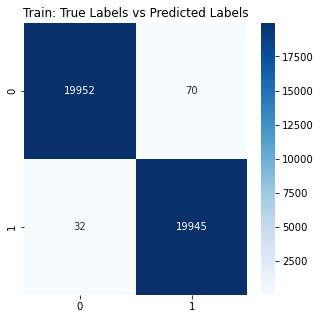

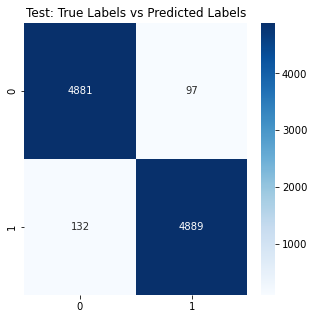

In [16]:
evaluate_model(model, X_train, y_train, X_test, y_test)